# Pymaceuticals Inc.
---

### Analysis

- The following data was pulled from a study of 249 mice that were exposed to one of ten different drug regimens.  The volume of the tumors they had were measured across up to 45 different days depending on the health of the mouse.  It should be noted that one of the mice was a duplicate and thus most of the data in the following analysis is based on 248 different mice.  After the data was established, I analyzed the data and drew two conclusions based on what I've seen.
- Observation 1: Capomulin had an equivalent number of mice that were given this drug regimen compared to others.  However, it seems that mice treated with this regimen tended to live longer thereby allowing for more data points that others did not survive to.  Also based on a random selection of 4 different mice that were treated with this regimen, it seems that all but 1 saw an overall reduction in the volume of the tumor, though there was a trend towards starting to grow again after 40 days of observation.  The exception was Mouse ID i557, which saw an increase in volume after an initially promising 5 days where the volume drastically reduced.
- Observation 2: When observing the bar graphs in this series, Propriva appears to be the least effective due to the fact that overall it has less timepoints than others.  However, the data pertaining to g989 was filtered off as a duplicate, and g989 was treated with Propriva.  It stands to reason that were the data to be included, it would bring Propriva more in line with what the other drug regimens had in terms of time points.  That stated it seems like most of the mice treated with Propriva saw an increase in the volume of the tumors compared to others, like Capomulin, that did see a decrease.
 

In [160]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study = pd.merge (mouse_metadata, study_results, how = "left", on = ["Mouse ID"] )

# Display the data table for preview
mouse_study

mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [161]:
#Rename Columns

mouse_study.rename(columns={'Mouse ID': 'mouse_id', 'Drug Regimen': 'drug_regimen', 'Weight (g)': 'weight_g', 'Tumor Volume (mm3)': 'tumor_volume_mm3', "Metastatic Sites": "metastatic_sites"}, inplace=True)

mouse_study

,mouse_id,drug_regimen,Sex,Age_months,weight_g,Timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
# Checking the number of mice.
mouse_study["mouse_id"].nunique()

print("There are", mouse_study["mouse_id"].nunique() , "unique mice in the data set.")

There are 249 unique mice in the data set.


In [163]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study["mouse_id"].value_counts()


mouse_id
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [164]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_study[mouse_study.duplicated()]

print(duplicates)


    mouse_id drug_regimen     Sex  Age_months  weight_g  Timepoint  \
909     g989     Propriva  Female          21        26          0   

     tumor_volume_mm3  metastatic_sites  
909              45.0                 0  


In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = (mouse_study['mouse_id'] != 'g989')

mouse_study_v2 = mouse_study.loc[mask2]

mouse_study_v2


,mouse_id,drug_regimen,Sex,Age_months,weight_g,Timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [166]:
# Checking the number of mice in the clean DataFrame.
mouse_study_v2.groupby("drug_regimen")['mouse_id'].nunique()

print("After filtering the data to remove mouse_id g989 there are", mouse_study_v2['mouse_id'].nunique(), "unique mice in this data set")





After filtering the data to remove mouse_id g989 there are 248 unique mice in this data set


## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_count = mouse_study_v2.groupby("drug_regimen")['tumor_volume_mm3'].count()
mean_drug_regimen = mouse_study_v2.groupby("drug_regimen")['tumor_volume_mm3'].mean().reset_index()
median_drug_regimen = mouse_study_v2.groupby("drug_regimen")['tumor_volume_mm3'].median().reset_index()
variance_drug_regimen = mouse_study_v2.groupby("drug_regimen")['tumor_volume_mm3'].var().reset_index()
std_drug_regimen = mouse_study_v2.groupby("drug_regimen")['tumor_volume_mm3'].std().reset_index()
ste_drug_regimen = mouse_study_v2.groupby("drug_regimen")['tumor_volume_mm3'].std() / np.sqrt(mouse_count)
sem_df = pd.DataFrame(ste_drug_regimen)



# Merge Data Frames

mean_median = pd.merge(mean_drug_regimen, median_drug_regimen, on = 'drug_regimen', how = 'left')
variance_std= pd.merge(variance_drug_regimen, std_drug_regimen, on = 'drug_regimen', how = 'left')
variance_std_sem = pd.merge(variance_std, sem_df, on = 'drug_regimen', how = 'left')



# Assemble the resulting series into a single summary DataFrame.

drug_regimen_agg = pd.merge(mean_median, variance_std_sem, on = 'drug_regimen', how = 'left')


drug_regimen_agg.rename(columns = {'tumor_volume_mm3_x_x': 'mean_tumor_volume', 'tumor_volume_mm3_y_x': 'median_tumor_volume', 'tumor_volume_mm3_x_y': 'tumor_volume_variance', 'tumor_volume_mm3_y_y': 'tumor_volume_std_dev', 'tumor_volume_mm3' : 'tumor_volume_ste'}, inplace=True)

drug_regimen_agg

,drug_regimen,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_ste
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [168]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg_v2 = mouse_study_v2.groupby('drug_regimen')['tumor_volume_mm3'].agg(['mean', 'median', 'var', 'std', 'sem']) #expert provided this code, I understand why it was used.

drug_regimen_agg_v2



,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

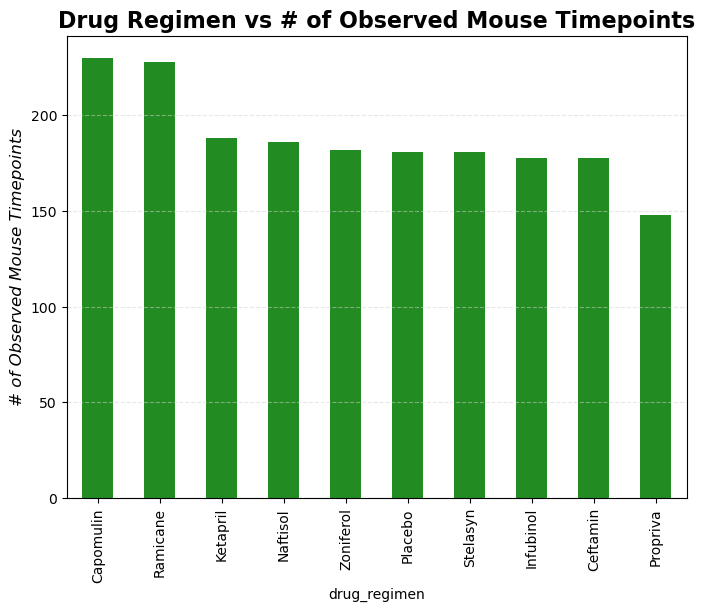

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Step 1: Get the data
# x: timepoints, y: Drug Regimen

chart_drug_regimen = mouse_study_v2['drug_regimen'].value_counts()

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
chart_drug_regimen.plot(xlabel= 'drug_regimen', ylabel= 'Count' , kind= 'bar', color="forestgreen")

# Step 4: Customization
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic")
plt.title("Drug Regimen vs # of Observed Mouse Timepoints", fontsize=16, fontweight="bold")


plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save
plt.show()






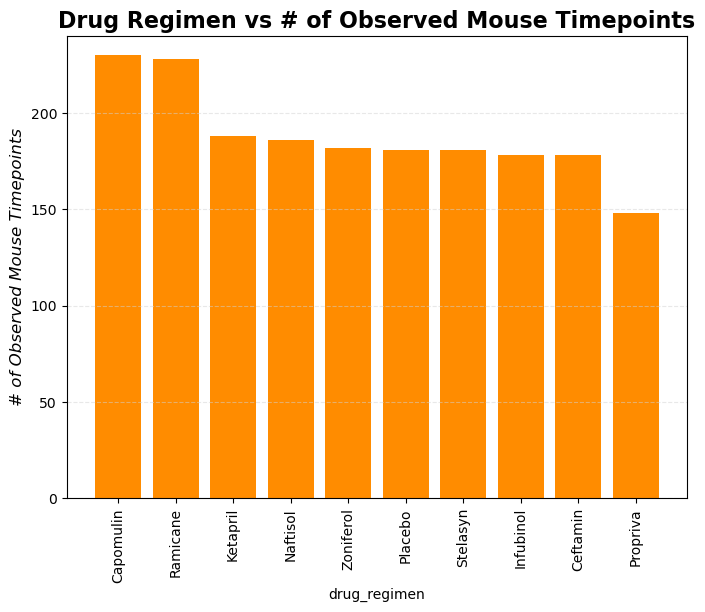

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Step 1: Get the data
# x: timepoints, y: Drug Regimen

chart_drug_regimen_matplot = {'drug_regimen': ['Capomulin','Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol',  'Ceftamin', 'Propriva'],
        'Total Timepoints': [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]}



# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot

plt.bar(chart_drug_regimen_matplot['drug_regimen'], chart_drug_regimen_matplot['Total Timepoints'], color = "darkorange")

plt.xlabel('drug_regimen')
plt.ylabel('Timepoints')
plt.title("Drug Regimen vs # of Observed Mouse Timepoints", fontsize=16, fontweight="bold")



# Step 4: Customization
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic")

plt.ylim(0,240)

plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

plt.xticks(rotation=90)

# Step 5: Show/Save
plt.show()



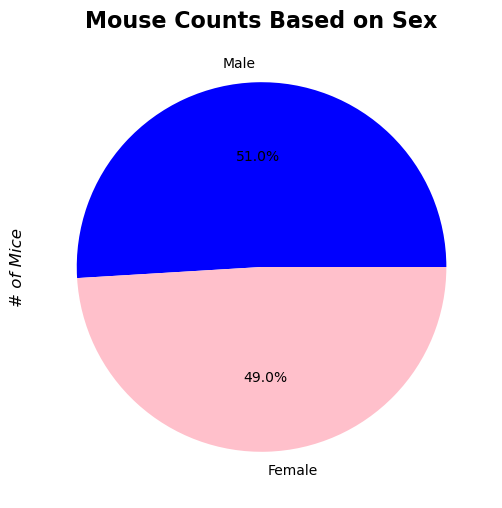

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Step 1: Get the data
# x: timepoints, y: Drug Regimen

pie_drug_regimen = mouse_study_v2['Sex'].value_counts()


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))


# Step 3: Create the skeleton plot
pie_colors = ["Blue", 'Pink']
pie_drug_regimen.plot.pie(autopct='%1.1f%%', startangle=360, colors= pie_colors)



# Step 4: Customization



plt.ylabel("# of Mice", fontsize=12, fontstyle="italic")
plt.title("Mouse Counts Based on Sex", fontsize=16, fontweight="bold")
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)


# Step 5: Show/Save
plt.show()

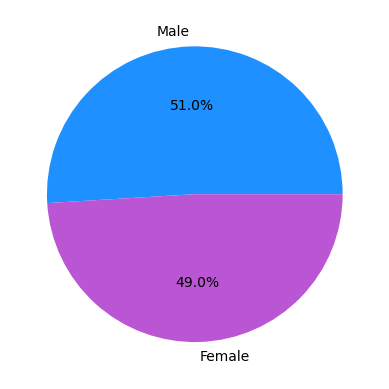

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["dodgerblue", "mediumorchid"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=360)
plt.show()

## Quartiles, Outliers and Boxplots
### Calculate the final tumor volume of each mouse across four of the treatment regimens

In [173]:
# Start by getting the last (greatest) timepoint for each mouse

max_base = mouse_study_v2.groupby('mouse_id').agg(Timepoint =('Timepoint', 'max'), tumor_volume_mm3 = ('tumor_volume_mm3', 'last'))
max_base

,Timepoint,tumor_volume_mm3
mouse_id,,
a203,45,67.973419
a251,45,65.525743
a262,45,70.717621
a275,45,62.999356
a366,30,63.440686
...,...,...
z435,10,48.710661
z578,45,30.638696
z581,45,62.754451


In [174]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [175]:
# Put treatments into a list for for loop (and later for plot labels): # Capomulin, Ramicane, Infubinol, and Ceftamin
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 

#Filter mouse_data_v2 to only have the promising drugs

filtered_drug_regimen =  mouse_study_v2[mouse_study_v2['drug_regimen'].isin(promising_drugs)]

# Create empty list to fill with tumor vol data (for plotting)
promising_drugs_plot = []
# For each promising drug

    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    
        
    # add tumor volume series to the plotting list 

    
    # Determine outliers using IQR, upper and lower bounds



for drug in promising_drugs:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    tumor_volumes = filtered_drug_regimen.loc[filtered_drug_regimen['drug_regimen'] == drug, 'tumor_volume_mm3']
    
    # Add tumor volume series to the plotting list
    promising_drugs_plot.append(tumor_volumes)
    
    # Determine outliers using IQR, upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, .5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

    print(f'Outliers for {drug}: {outliers}')

Outliers for Capomulin: Series([], Name: tumor_volume_mm3, dtype: float64)
Outliers for Ramicane: Series([], Name: tumor_volume_mm3, dtype: float64)
Outliers for Infubinol: Series([], Name: tumor_volume_mm3, dtype: float64)
Outliers for Ceftamin: Series([], Name: tumor_volume_mm3, dtype: float64)


In [176]:
# Start by getting the last (greatest) timepoint for each mouse


max_filtered_drug = filtered_drug_regimen.groupby('mouse_id').agg(max_timepoint=('Timepoint', 'max'))
max_base = mouse_study_v2.groupby('mouse_id').agg(Timepoint =('Timepoint', 'max'), tumor_volume_mm3 = ('tumor_volume_mm3', 'last'))
                                                             
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

study_max_merge = pd.merge(max_filtered_drug, max_base, on = ['mouse_id'], how = 'left')

study_max_merge



,max_timepoint,Timepoint,tumor_volume_mm3
mouse_id,,,
a203,45,45,67.973419
a251,45,45,65.525743
a275,45,45,62.999356
a411,45,45,38.407618
a444,45,45,43.047543
...,...,...,...
y769,45,45,68.594745
y793,45,45,31.896238
y865,45,45,64.729837


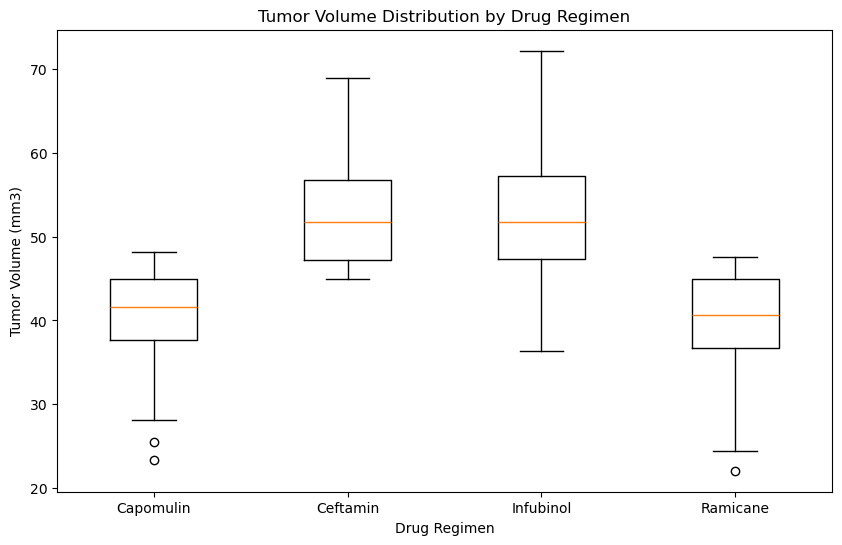

In [177]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Group data by Drug Regimen and extract tumor volume data
grouped_data = filtered_drug_regimen.groupby('drug_regimen')['tumor_volume_mm3'].apply(list)


# Create Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, labels=grouped_data.index)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Drug Regimen')

# # Show the plot
plt.show()

## Line and Scatter Plots

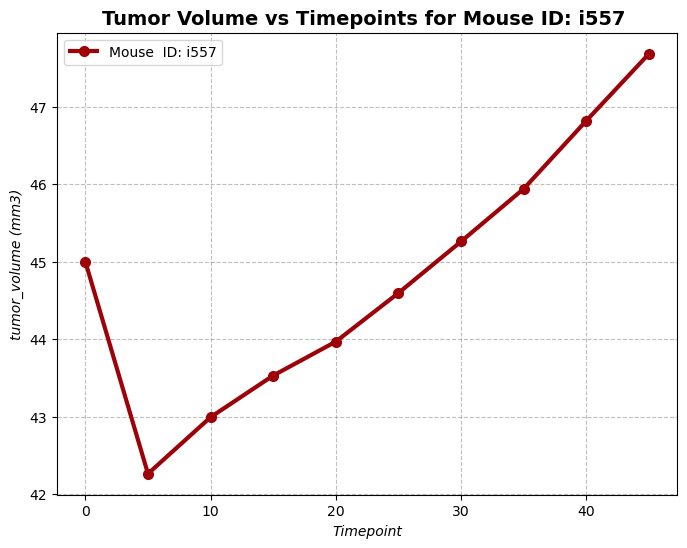

In [178]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mask3 = (mouse_study['mouse_id'] == 'i557')

mouse_study_i557 = mouse_study.loc[mask3]


timepoints_i557 = mouse_study_i557['Timepoint']
tumor_volume_i557 = mouse_study_i557['tumor_volume_mm3']

plt.figure(figsize=(8,6))

plt.plot(timepoints_i557, tumor_volume_i557, color = "#9d0208", linewidth = 3, marker = "o", markersize = 7, label = "Mouse  ID: i557")


plt.xlabel("Timepoint", fontsize = 10, fontstyle = "italic")
plt.ylabel("tumor_volume (mm3)", fontsize = 10, fontstyle = "italic")
plt.title("Tumor Volume vs Timepoints for Mouse ID: i557 ", fontsize = 14, fontweight = "bold")

plt.legend()
plt.grid(color = "grey", linestyle = "--", alpha = 0.5)


plt.show()



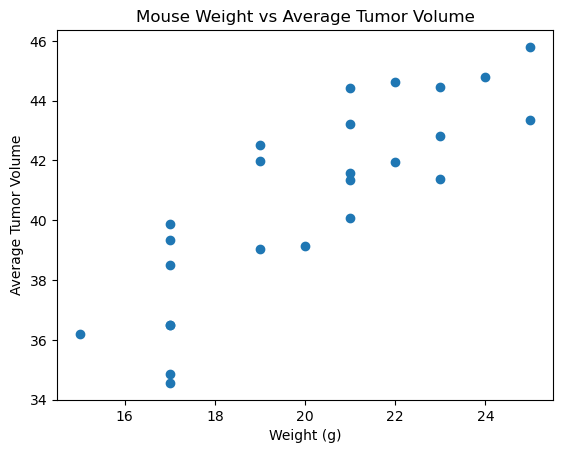

In [179]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


mouse_study_capomulin = mouse_study_v2[mouse_study_v2['drug_regimen'] == 'Capomulin']


average_tumor = mouse_study_capomulin.groupby('mouse_id').agg({'tumor_volume_mm3': 'mean', 'weight_g': 'mean'})


plt.scatter(average_tumor['weight_g'], average_tumor['tumor_volume_mm3'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()


## Correlation and Regression

                  tumor_volume_mm3  weight_g
tumor_volume_mm3          1.000000  0.841936
weight_g                  0.841936  1.000000


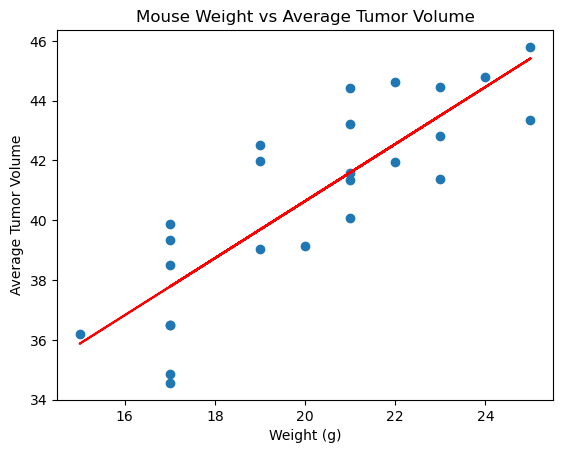

In [180]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation coefficient

correlation_coefficient = average_tumor.corr()
print(correlation_coefficient)

# Line Regression.   Note: solved correlations exercise served as the baseline for this code.

(slope, intercept, rvalue, pvalue, stderr) = linregress((average_tumor)['weight_g'], (average_tumor['tumor_volume_mm3']))
regress_values = average_tumor['weight_g'] * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(average_tumor['weight_g'], average_tumor['tumor_volume_mm3'])
plt.plot(average_tumor['weight_g'],regress_values,"r-")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()


